# **Homework IV**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

## II. Programming and critical analysis

#### Pergunta 1)

8


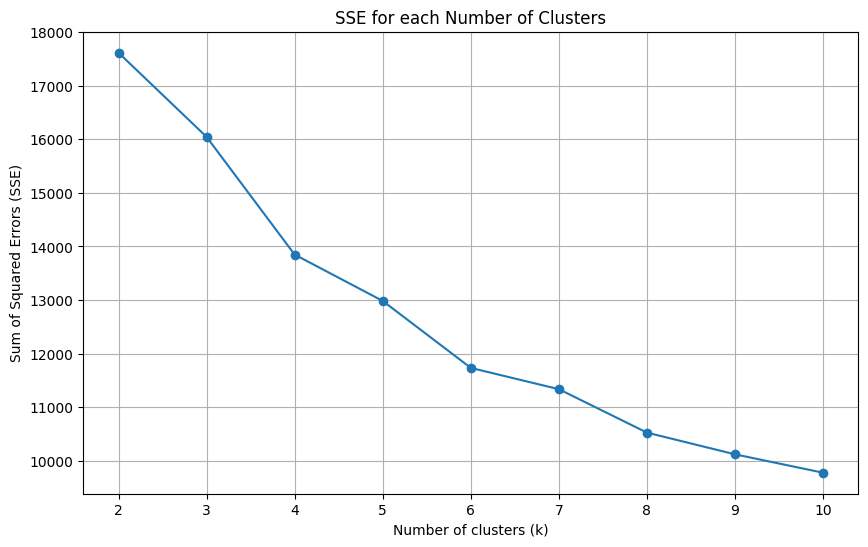

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('accounts.csv')

# Select the first 8 features
data = df.iloc[:, :8]

# Remove duplicates and null values
data = data.drop_duplicates()
data = data.dropna()

# Change the feature type from categorical to numerical 
data = pd.get_dummies(data, drop_first=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Define the range of k values (number of clusters)
k_values = [2,3,4,5,6,7,8,9,10]

# Store SSE values
sse = []

# Apply K-Means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42, init='random')
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared errors (SSE)

import math
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

print(optimal_number_of_clusters(sse))

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for each Number of Clusters')
plt.grid(True)
plt.show()

#### Pergunta 2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Com base no gráfico que relaciona os valores de erro (*SSE*) com os diferentes números de *clusters*, é possível concluir que o número ótimo de *clusters* é 5.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Esta conclusão deriva do método do cotovelo, que identifica um ponto onde adicionar mais *clusters* deixa de resultar numa diminuição muito significativa do *SSE*, o que se traduz, graficamente, num ponto a partir do qual o declive fica menos acentuado. No gráfico obtido, tal ponto situa-se onde o número de *clusters* é 5. Até este ponto observa-se uma diminuição acentuada do *SSE*, sendo que para valores superiores a 5, o erro vai reduzindo pouco para cada incremento de k.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Existe um *trade-off* entre os *clusters* e os valores de erro. Apesar do aumento do número de *clusters* levar à deteção de padrões mais específicos nos dados, a uma segmentação
mais detalhada e a um menor valor de erro, a complexidade também aumenta. Este aumento de complexidade pode levar a *overfitting*, onde o modelo ajusta-se demasiado aos dados de treino e captura "noisy features". Nesta situação o modelo torna-se demasiado complexo para fazer uma generalização equilibrada.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Por este motivo, é necessário escolher um número de *clusters* em que o modelo é suficientemente complexo para capturar os padrões relevantes nos dados (e portanto tenha um *SSE* reduzido), mas não tão complexo a ponto de se ajustar excessivamente a detalhes irrelevantes que não generalizam bem para novos dados. Logo, a partir do valor 5, o valor de erro inferior não compensa o ganho de complexidade deste número de clusters.

#### Pergunta 3)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ao analisar as variáveis do conjunto de dados, podemos concluir que grande parte destas são categóricas como, por exemplo, "job", "marital" e "education". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O método *k*-means calcula a distância euclidiana entre pontos e utiliza a média para determinar os centróides de cada *cluster* em cada iteração. Sendo assim, é uma abordagem que funciona com variáveis numéricas, mas não com variáveis categóricas. O método *k*-modes, por sua vez, determina os centróides através da moda de cada variável, isto é, a categoria mais frequente dessa variável num dado cluster, e atribui um ponto a determinado *cluster* consoante a sua semelhança aos centróides obtidos. Por este motivo, para agrupar observações com variáveis categóricas em segmentos diferentes, o *k*-modes é o método mais apropriado.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Uma vez que os nossos dados não são compostos apenas por variáveis numéricas, mas também por variáveis categóricas (ou são compostos por vários atributos categóricos), deduzimos que o *k*-modes seria, de facto, uma abordagem de *clustering* mais adequada do que o *k*-means.